In [1]:
# ODE simulations

In [2]:
from __future__ import print_function, division
import pandas as pd
from pprint import pprint
import tellurium as te

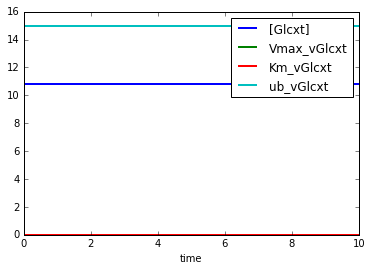

<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

In [3]:
# load model
mbounds = './results/diauxic_bounds.xml'
r = te.loads(mbounds)
r.timeCourseSelections += r.getGlobalParameterIds()
s = r.simulate(0, 10, steps=200)
r.plot()

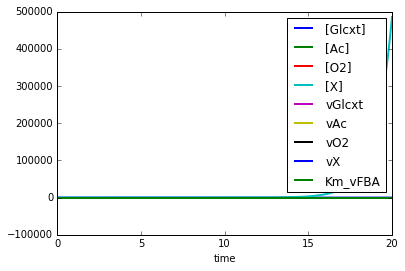

<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

In [6]:
# load model
mupdate = './results/diauxic_update.xml'
r = te.loads(mupdate)
r.timeCourseSelections += r.getGlobalParameterIds()
s = r.simulate(0, 20, steps=200)
r.plot()




In [5]:
s

    time,      [Glcxt],         [Ac],         [O2],        [X], vGlcxt, vAc, vO2, vX, Km_vFBA
 [[    0,         10.8,          0.4,         0.21,      0.001,      1,   1,   1,  1,    0.02],
  [ 0.05,      10.7999,     0.399951,     0.209953, 0.00105129,      1,   1,   1,  1,    0.02],
  [  0.1,      10.7999,       0.3999,     0.209904,  0.0011052,      1,   1,   1,  1,    0.02],
  [ 0.15,      10.7998,     0.399846,     0.209852, 0.00116188,      1,   1,   1,  1,    0.02],
  [  0.2,      10.7998,     0.399789,     0.209798, 0.00122146,      1,   1,   1,  1,    0.02],
  [ 0.25,      10.7997,     0.399729,     0.209741, 0.00128409,      1,   1,   1,  1,    0.02],
  [  0.3,      10.7997,     0.399667,     0.209681, 0.00134993,      1,   1,   1,  1,    0.02],
  [ 0.35,      10.7996,     0.399601,     0.209617, 0.00141914,      1,   1,   1,  1,    0.02],
  [  0.4,      10.7995,     0.399532,     0.209551, 0.00149191,      1,   1,   1,  1,    0.02],
  [ 0.45,      10.7994,     0.399459,     